In [1]:
import pandas as pd
import math
from fuzzywuzzy import fuzz
import numpy as np

pd.options.display.max_rows = 999
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import glob

import warnings
warnings.filterwarnings("ignore")


/Users/linzipeng/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


<font color=black size=6 face=雅黑>**标普矿点数据数据探索报告**</font>


In [2]:
import plotly.offline as pyo
pyo.init_notebook_mode()


In [3]:
%%html
<style>
table {float:center}
</style>

In [4]:
import plotly.express as px
import plotly.graph_objs as go


In [5]:
import plotly.io as pio
pio.renderers.default='notebook'

In [6]:
import seaborn as sns
sns.set(color_codes=True)#导入seaborn包设定颜色

import matplotlib.pyplot as plt

%matplotlib inline


# 数据准备

In [7]:
f1 = '/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP_metal_and_mining_database/cleaned_data/SPGlobal_general_info.xlsx'


In [8]:
main = pd.read_excel(f1)

print('------------'*5, '\n示例')
main.head()
print('------------'*5,'\nDataFrame大小')
print(main.shape)


------------------------------------------------------------ 
示例


prop_name  prop_id  prop_id.1               prop_name.1  \
0        Chihuahua Refinery    86959      86959        Chihuahua Refinery   
1                       101    64665      64665                       101   
2                      1068    79522      79522                      1068   
3  10th of Ramadan Refinery    86452      86452  10th of Ramadan Refinery   
4   10th of Ramadan Smelter    86451      86451   10th of Ramadan Smelter   

  also_known_as primary_commodity    dev_stage actv_status  yr_source_date  \
0           NaN              Lead    Operating      Active          2020.0   
1           NaN              Coal    Operating         NaN          2011.0   
2           NaN              Gold  Exploration      Active          2020.0   
3           NaN              Lead    Operating      Active          2021.0   
4           NaN              Lead    Operating      Active          2021.0   

   mo_source_date mo_yr_source_date mine_type1 mine_type2 mine_type3  \
0             2.0           02/2020        NaN        NaN        NaN   
1            12.0           12/2011        NaN        NaN        NaN   
2            10.0           10/2020        NaN        NaN        NaN   
3             2.0           02/2021        NaN        NaN        NaN   
4             2.0           02/2021        NaN        NaN        NaN   

         commodities_list  
0                    Lead  
1                    Coal  
2  Gold,Copper,Molybdenum  
3                    Lead  
4                    Lead

------------------------------------------------------------ 
DataFrame大小
(39135, 15)


------------------------------------------------------------ 
主要包括以下矿物


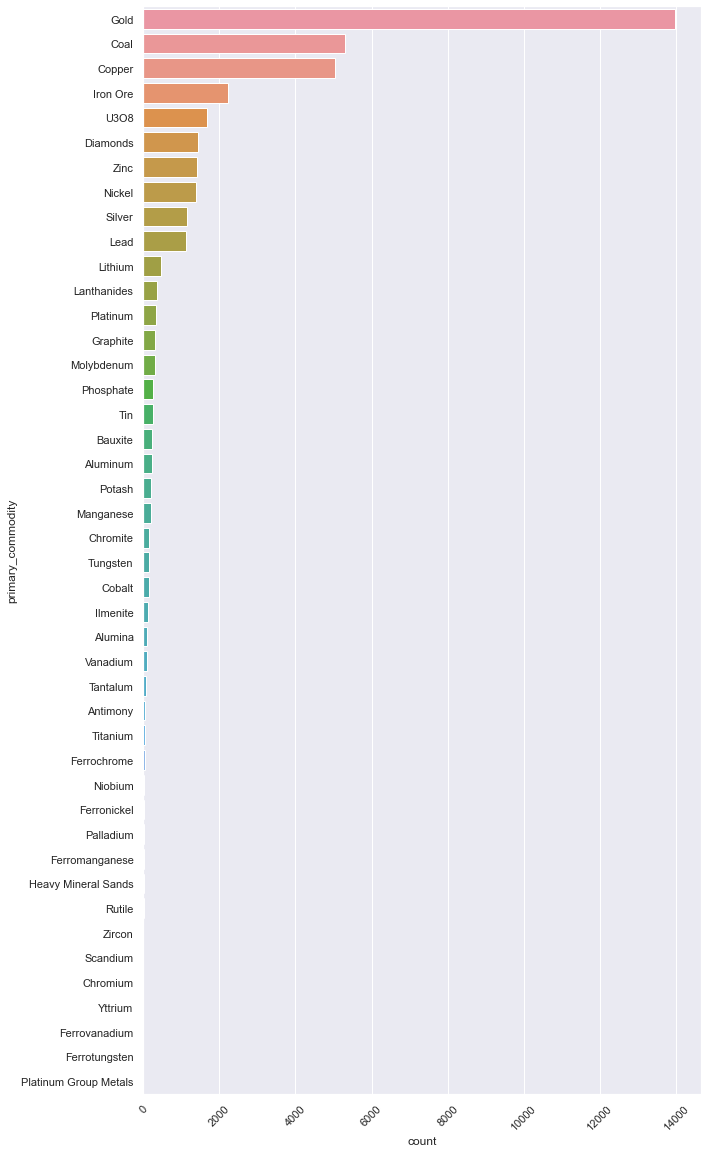

In [9]:
t = plt.figure(figsize=(10, 20))
ax = sns.countplot(y="primary_commodity", data=main, order=main['primary_commodity'].value_counts().index, orient='v')
t = plt.xticks(rotation=45)
print('------------'*5, '\n主要包括以下矿物')


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/t_/tbm4rmys2y581cf5dzgnzrvr0000gn/T/jieba.cache
Loading model cost 0.509 seconds.
Prefix dict has been built successfully.


------------------------------------------------------------ 
 wordcloud如下


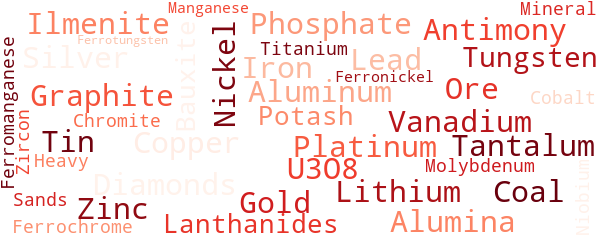

In [10]:
from wordcloud import WordCloud
import numpy as np
import jieba
wcd=WordCloud(background_color=None,repeat=True,max_words=40,height=240,width=600,
            max_font_size=30,colormap="Reds",
             mode="RGBA")

text=' '.join((main['primary_commodity'].unique()))

ss=" ".join(jieba.lcut(text))
t = wcd.generate(ss)

print('------------'*5, '\n wordcloud如下')
wcd.to_image()


In [11]:
print('矿点总数量：', main.shape[0])
main = main[(main['primary_commodity']=='Cobalt')|(main['commodities_list'].str.contains('Cobalt'))|(main['commodities_list'].str.contains('Cobalt'))]
print('镍矿总数量（commodities_list包含镍）：', main.shape[0])


矿点总数量： 39135
镍矿总数量（commodities_list包含镍）： 1342


In [12]:
output_path = '/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP_metal_and_mining_database/cleaned_data/'
files = glob.glob(output_path + '*.xlsx')
dic = []

print('------------'*5, '\n Loading data')
for f in files:
    section = f.split('cleaned_data/SPGlobal_')[-1].split('.xlsx')[0]
#     print(section)
    if f!='/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP_metal_and_mining_database/cleaned_data/SPGlobal_general_info.xlsx':
        temp = pd.read_excel(f)
        dic += [(section, i) for i in temp.columns]
        main = pd.merge(main, temp, how='left', on=['prop_id', 'prop_name'])


------------------------------------------------------------ 
 Loading data


In [13]:
feature_dic = pd.DataFrame(dic).set_index(0)


In [14]:
# main = main.drop(main.isnull().mean()[main.isnull().mean()>0.9].index.tolist(), axis=1)


In [15]:
# main = main[main['primary_commodity']=='Cobalt']

In [16]:
main.head()

prop_name  prop_id  prop_id.1           prop_name.1  \
0                1514-M    29336      29336                1514-M   
1                   292    81570      81570                   292   
2                 Acoje    31679      31679                 Acoje   
3  Adelaide Geosyncline    79925      79925  Adelaide Geosyncline   
4              AER Kidd    31879      31879              AER Kidd   

                                       also_known_as primary_commodity_x  \
0                                                NaN              Nickel   
1                      CMTC, Comima, Comipad, Nkwali              Copper   
2  Acoje, Central Block, ENK, MPSA No. 191-2004-I...              Nickel   
3   Cartarpo, EL 5999, EL/ELA 6226, Screechowl Creek              Copper   
4  Aer-Kidd, Howland pit, Lockerby East, Perch La...              Copper   

            dev_stage actv_status  yr_source_date  mo_source_date  \
0      Target Outline    Inactive          1995.0             9.0   
1      Target Outline      Active          2019.0             8.0   
2  Limited Production      Active          2019.0             3.0   
3         Exploration      Active          2019.0             2.0   
4      Target Outline      Active          2020.0             5.0   

  mo_yr_source_date mine_type1   mine_type2 mine_type3  \
0           09/1995   Open Pit          NaN        NaN   
1           08/2019        NaN          NaN        NaN   
2           03/2019   Open Pit  Underground        NaN   
3           02/2019        NaN          NaN        NaN   
4           05/2020   Open Pit  Underground        NaN   

                                    commodities_list  \
0                               Nickel,Copper,Cobalt   
1                               Copper,Cobalt,Silver   
2  Nickel,Cobalt,Palladium,Platinum,Chromite,Chro...   
3           Copper,Cobalt,Lanthanides,Lithium,Nickel   
4  Copper,Nickel,Platinum,Palladium,Gold,Silver,C...   

   interval_grade_g_per_tonne  grade_x_interval_g_per_tonne  \
0                         NaN                           NaN   
1                         NaN                           NaN   
2                         NaN                           NaN   
3                         NaN                           NaN   
4                        0.15                          2.04   

   interval_grade_equiv_g_per_tonne  grade_equiv_x_interval_g_per_tonne  \
0                               NaN                                 NaN   
1                               NaN                                 NaN   
2                               NaN                                 NaN   
3                               NaN                                 NaN   
4                          6.617709                           90.000846   

   interval_grade_pct  grade_x_interval_pct  interval_grade_equiv_pct  \
0                 NaN                   NaN                       NaN   
1                 NaN                   NaN                       NaN   
2                 NaN                   NaN                       NaN   
3                 NaN                   NaN                       NaN   
4                1.22                16.592                  5.986979   

   grade_equiv_x_interval_pct  interval_grade_ppm  grade_x_interval_ppm  \
0                         NaN                 NaN                   NaN   
1                         NaN                 NaN                   NaN   
2                         NaN                 NaN                   NaN   
3                         NaN                 NaN                   NaN   
4                   81.422913                 NaN                   NaN   

   interval_grade_equiv_ppm  grade_equiv_x_interval_ppm  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       Na

In [17]:
# import pandas_profiling
# pandas_profiling.ProfileReport(main)


# 基于所有矿点的基本信息和位置信息

## 所有含镍矿点的地域分布

In [18]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(main.dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mine distribution',
                        zoom = 2,
                        radius = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" ,},
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [19]:
labels = main['country_name'].value_counts().index.tolist()[:9]
main.loc[:, 'country_name_new'] = main.loc[:, 'country_name']
main.loc[~main['country_name'].isin(labels), 'country_name_new'] = 'others'


------------------------------------------------------------ 
矿点的国家分布


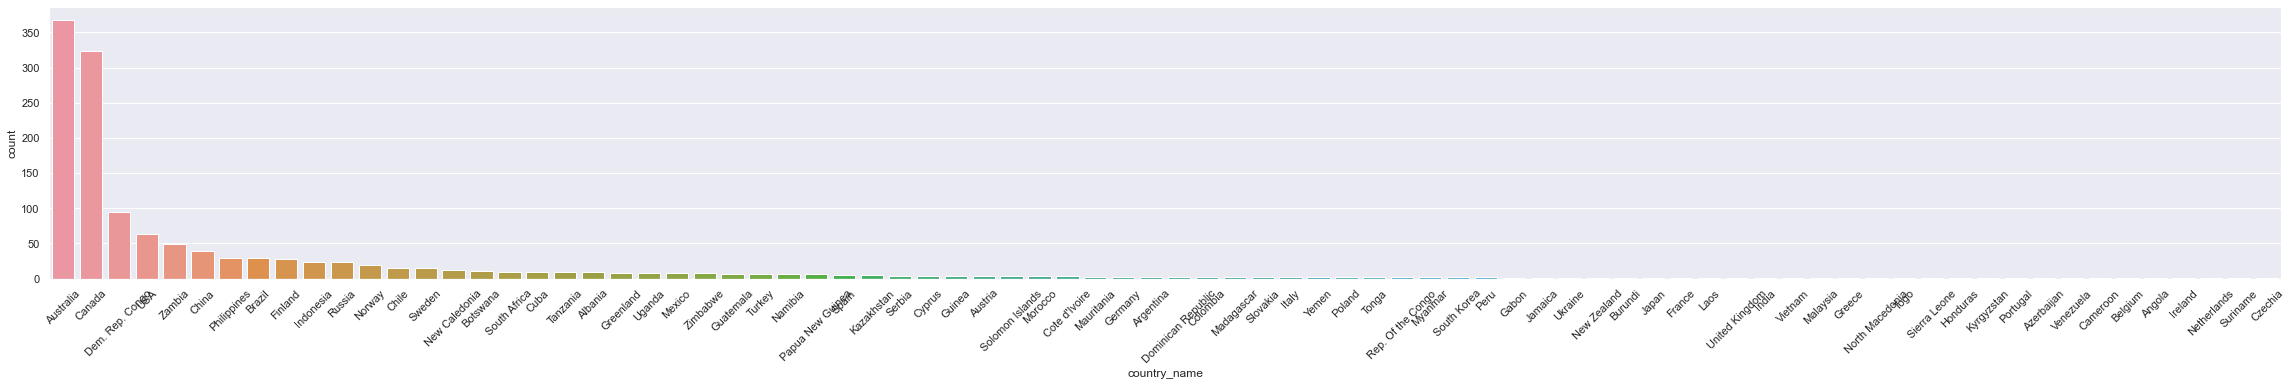

In [20]:
print('------------'*5, '\n矿点的国家分布')
t = plt.figure(figsize=(40, 5))
ax = sns.countplot(x="country_name", data=main, order=main['country_name'].value_counts().index)
t = plt.xticks(rotation=45)


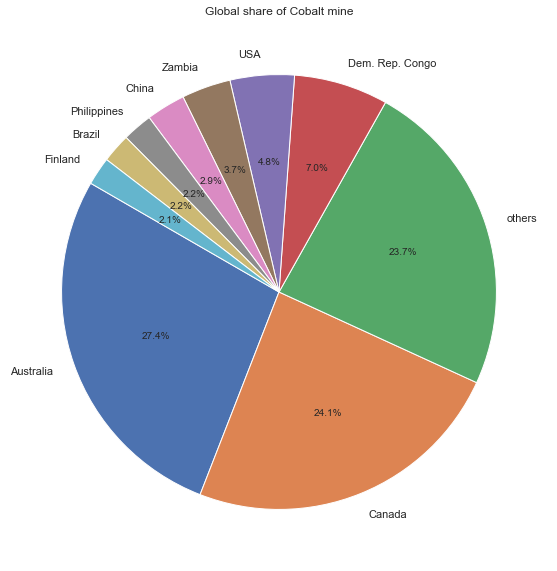

In [21]:
labels = main['country_name_new'].value_counts().index.tolist()
sizes = main['country_name_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


------------------------------------------------------------ 
矿点的地域分布


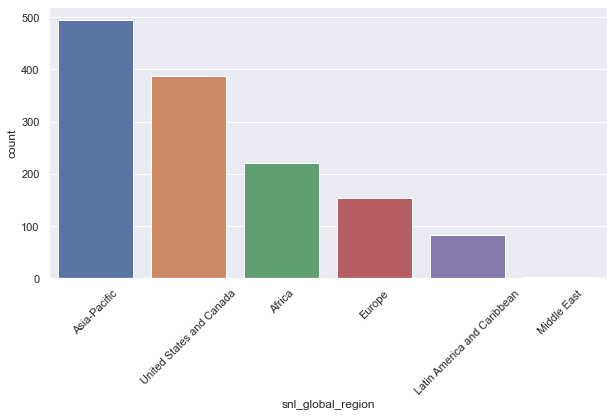

In [22]:
print('------------'*5, '\n矿点的地域分布')
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="snl_global_region", data=main, order=main['snl_global_region'].value_counts().index)
t = plt.xticks(rotation=45)


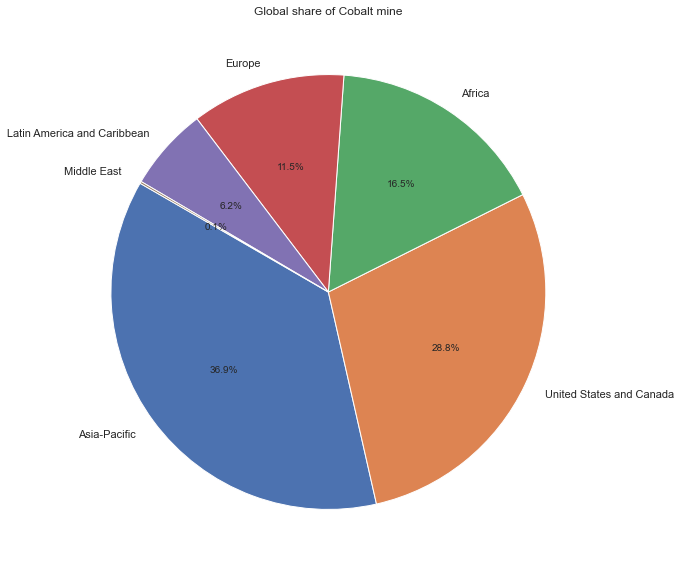

In [23]:
labels = main['snl_global_region'].value_counts().index.tolist()
sizes = main['snl_global_region'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


## 判断主要矿产是否为镍

In [24]:
main['is_cobalt_primary'] = (main['primary_commodity']=='Cobalt').astype(int)


In [25]:
print('主要产品为镍的矿点数量')
main['is_cobalt_primary'].value_counts()


主要产品为镍的矿点数量


0    1197
1     145
Name: is_cobalt_primary, dtype: int64

In [28]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [29]:
def calculate_based_on_region(snl_global_region=None):
    if snl_global_region is not None:
        temp = main[main['snl_global_region']==snl_global_region]
    else:
        temp = main.copy()

    item_lst = temp['commodities_list'].map(lambda x: x.split(',')+['Cobalt']).tolist()

    te = TransactionEncoder()
    te_ary = te.fit(item_lst).transform(item_lst)
    temp = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = apriori(temp, min_support=0.1, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    res = frequent_itemsets[ (frequent_itemsets['length'] >= 2) &
                             (frequent_itemsets['support'] >= 0.5) ]
    return res.sort_values(by='support', ascending=False)


In [30]:
print('\n------------------------------\n各地区矿产伴生情况\n', '\nglobal')
calculate_based_on_region()


------------------------------
各地区矿产伴生情况
 
global


support          itemsets  length
10  0.751118  (Copper, Cobalt)       2
14  0.654247  (Nickel, Cobalt)       2

In [31]:
for i in main['snl_global_region'].unique():
    print('\n------------------------------\n', i)
    calculate_based_on_region(i)


------------------------------
 United States and Canada


support                  itemsets  length
10  0.808786          (Copper, Cobalt)       2
13  0.710594          (Nickel, Cobalt)       2
21  0.599483          (Copper, Nickel)       2
44  0.599483  (Copper, Nickel, Cobalt)       3
11  0.545220            (Gold, Cobalt)       2


------------------------------
 Africa


support          itemsets  length
7  0.923077  (Copper, Cobalt)       2


------------------------------
 Asia-Pacific


support          itemsets  length
14  0.741414  (Nickel, Cobalt)       2
10  0.662626  (Copper, Cobalt)       2


------------------------------
 Latin America and Caribbean


support          itemsets  length
11  0.602410  (Nickel, Cobalt)       2
8   0.554217  (Copper, Cobalt)       2


------------------------------
 Europe


support                  itemsets  length
10  0.772727          (Nickel, Cobalt)       2
8   0.746753          (Copper, Cobalt)       2
16  0.551948          (Copper, Nickel)       2
33  0.551948  (Copper, Nickel, Cobalt)       3


------------------------------
 Middle East


support                                           itemsets  length
8        1.0                                   (Copper, Cobalt)       2
26       1.0                                 (Platinum, Nickel)       2
35       1.0                           (Copper, Nickel, Cobalt)       3
36       1.0                        (Copper, Cobalt, Palladium)       3
37       1.0                         (Platinum, Copper, Cobalt)       3
44       1.0                        (Nickel, Cobalt, Palladium)       3
45       1.0                         (Platinum, Nickel, Cobalt)       3
48       1.0                      (Platinum, Cobalt, Palladium)       3
57       1.0                        (Copper, Nickel, Palladium)       3
58       1.0                         (Platinum, Copper, Nickel)       3
61       1.0                      (Platinum, Copper, Palladium)       3
72       1.0                      (Platinum, Nickel, Palladium)       3
84       1.0                 (Platinum, Copper, Nickel, Cobalt)       4
87       1.0              (Platinum, Copper, Cobalt, Palladium)       4
98       1.0              (Platinum, Nickel, Cobalt, Palladium)       4
111      1.0              (Platinum, Copper, Nickel, Palladium)       4
130      1.0      (Platinum, Copper, Nickel, Cobalt, Palladium)       5
29       1.0                              (Platinum, Palladium)       2
83       1.0                (Copper, Nickel, Cobalt, Palladium)       4
16       1.0                                   (Copper, Nickel)       2
25       1.0                                (Nickel, Palladium)       2
11       1.0                                (Cobalt, Palladium)       2
12       1.0                                 (Platinum, Cobalt)       2
10       1.0                                   (Nickel, Cobalt)       2
17       1.0                                (Copper, Palladium)       2
18       1.0                                 (Platinum, Copper)       2
120      0.5                  (Platinum, Rhodium, Gold, Nickel)       4
116      0.5             (Platinum, Copper, Rhodium, Palladium)       4
117      0.5              (Platinum, Copper, Palladium, Silver)       4
118      0.5                (Platinum, Gold, Nickel, Palladium)       4
119      0.5                 (Rhodium, Gold, Nickel, Palladium)       4
123      0.5              (Platinum, Nickel, Palladium, Silver)       4
121      0.5               (Platinum, Gold, Rhodium, Palladium)       4
122      0.5             (Platinum, Rhodium, Nickel, Palladium)       4
114      0.5                (Platinum, Rhodium, Copper, Nickel)       4
124      0.5          (Copper, Nickel, Cobalt, Gold, Palladium)       5
125      0.5           (Platinum, Copper, Nickel, Cobalt, Gold)       5
115      0.5                 (Platinum, Copper, Nickel, Silver)       4
112      0.5               (Rhodium, Copper, Nickel, Palladium)       4
113      0.5                (Copper, Nickel, Palladium, Silver)       4
127      0.5        (Platinum, Copper, Cobalt, Gold, Palladium)       5
110      0.5                  (Platinum, Gold, Copper, Rhodium)       4
109      0.5                 (Gold, Copper, Rhodium, Palladium)       4
108      0.5                (Platinum, Gold, Copper, Palladium)       4
107      0.5                    (Rhodium, Gold, Copper, Nickel)       4
106      0.5                   (Platinum, Gold, Copper, Nickel)       4
105      0.5                  (Gold, Copper, Nickel, Palladium)       4
104      0.5              (Platinum, Silver, Cobalt, Palladium)       4
103      0.5             (Platinum, Rhodium, Cobalt, Palladium)       4
102      0.5                 (Platinum, Nickel, Cobalt, Silver)       4
101      0.5                (Platinum, Rhodium, Nickel, Cobalt)       4
100      0.5                (Silver, Nickel, Cobalt, Palladium)       4
99       0.5               (Rhodium, Nickel, Cobalt, Palladium)       4
97       0.5                  (Platinum, Gold, Rhodium, Cobalt)       4
126      0.5            (Copper, Nickel, Coba

各个地区是否是镍为主矿产

In [32]:
tmp = main.groupby(['country_name_new']).apply(lambda x: x['is_cobalt_primary'].value_counts(normalize=True)).unstack().fillna(0)
tmp.columns = ['N', 'Y']
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


In [33]:
tmp = main.groupby(['snl_global_region']).apply(lambda x: x['is_cobalt_primary'].value_counts(normalize=True)).unstack().fillna(0)
tmp.columns = ['N', 'Y']
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


### 镍矿的地域分布

以下以镍矿为例，来介绍标普矿点数据包含的信息维度

In [34]:
main = main[main['is_cobalt_primary']==1]


In [35]:
# token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

# fig = px.density_mapbox(main[main['is_cobalt_primary']==1].dropna(subset=['actv_status']),
#                         lon = 'longitude',
#                         lat = 'latitude',
#                         title = 'Cobalt mine distribution',
#                         zoom = 2,
#                         radius = 10, 
#                         color_continuous_scale = px.colors.carto.Temps )
# fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" ,},
#                  title = dict(x=0.5,xref='paper'),
#                  margin={'l':10,"r":0,'t':50,'b':10})


In [36]:
# t = plt.figure(figsize=(10, 5))
# ax = sns.countplot(x="country_name_new", data=main[(main['is_cobalt_primary']==1)], order=main[(main['is_cobalt_primary']==1)]['country_name_new'].value_counts().index)


In [37]:
# labels = main[main['is_cobalt_primary']==1]['country_name_new'].value_counts().index.tolist()
# sizes = main[main['is_cobalt_primary']==1]['country_name_new'].value_counts().values
# t = plt.figure(figsize=(10, 10))
# t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
# t = plt.title("Global share of Cobalt mine")


In [38]:
# t = plt.figure(figsize=(10, 5))
# ax = sns.countplot(x="snl_global_region", data=main[(main['is_cobalt_primary']==1)], order=main[(main['is_cobalt_primary']==1)]['snl_global_region'].value_counts().index)


In [39]:
# labels = main[main['is_cobalt_primary']==1]['snl_global_region'].value_counts().index.tolist()
# sizes = main[main['is_cobalt_primary']==1]['snl_global_region'].value_counts().values
# t = plt.figure(figsize=(10, 10))
# t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
# t = plt.title("Global share of Cobalt mine")


## 矿点活跃状态

当前矿点活跃状态的分布

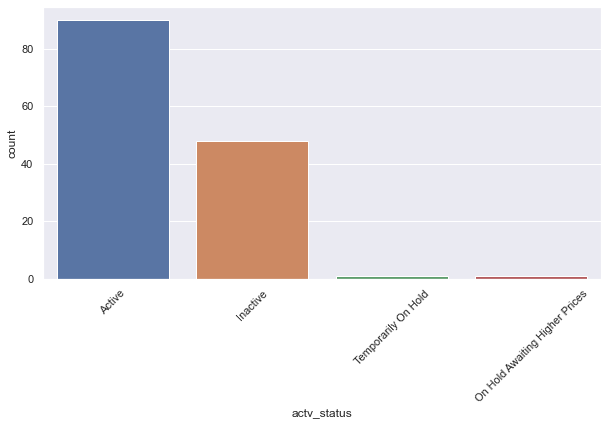

In [40]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="actv_status", data=main, order=main['actv_status'].value_counts().index)
t = plt.xticks(rotation=45)


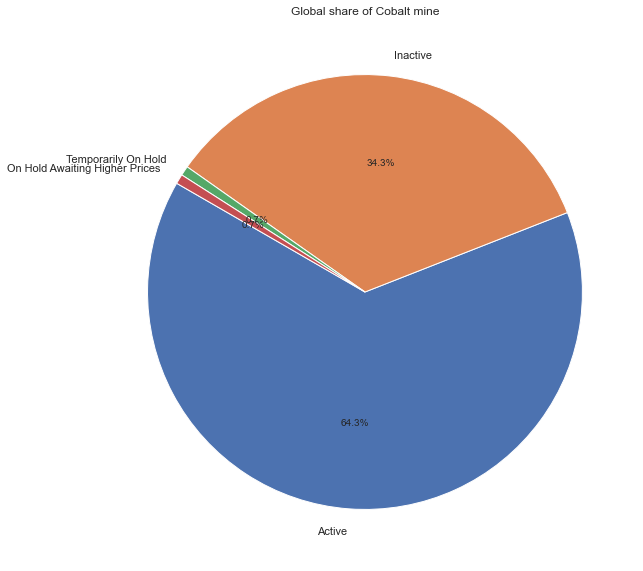

In [41]:
labels = main['actv_status'].value_counts().index.tolist()
sizes = main['actv_status'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


各阶段矿点的全球分布情况

In [42]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'The Distribution of Cobalt Mines',
                        color = 'actv_status',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [43]:
tmp = main.groupby(['country_name_new']).apply(lambda x: x['actv_status'].value_counts(normalize=True)).unstack().fillna(0).T
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


In [44]:
tmp = main.groupby(['snl_global_region']).apply(lambda x: x['actv_status'].value_counts(normalize=True)).unstack().fillna(0).T
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


### 活跃镍矿点的地域分布

In [45]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(main[main['is_cobalt_primary']==1].dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mine distribution',
                        zoom = 2,
                        radius = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


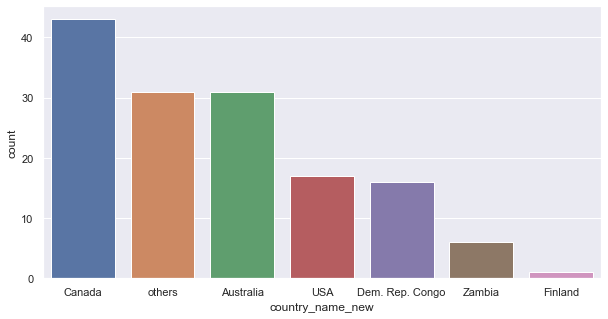

In [46]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="country_name_new", data=main[(main['is_cobalt_primary']==1)], order=main[(main['is_cobalt_primary']==1)]['country_name_new'].value_counts().index)


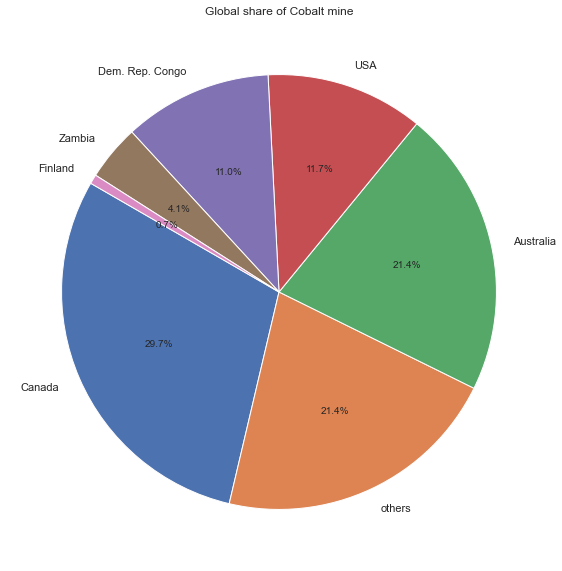

In [47]:
labels = main[main['is_cobalt_primary']==1]['country_name_new'].value_counts().index.tolist()
sizes = main[main['is_cobalt_primary']==1]['country_name_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


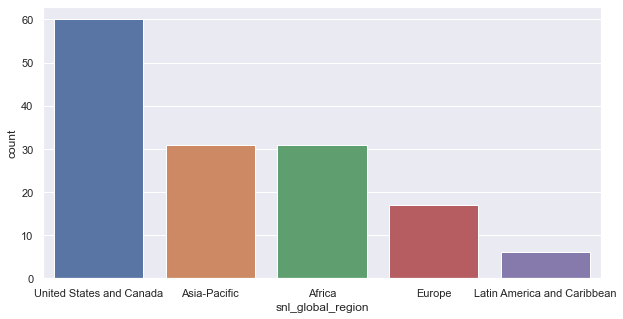

In [48]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="snl_global_region", data=main[(main['is_cobalt_primary']==1)], order=main[(main['is_cobalt_primary']==1)]['snl_global_region'].value_counts().index)


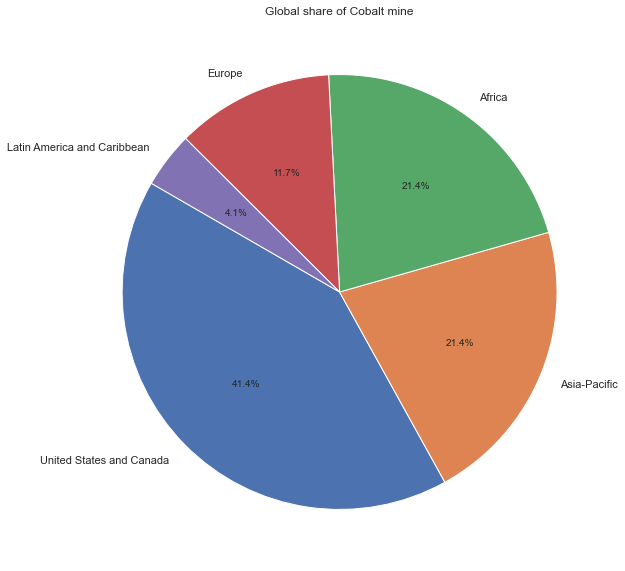

In [49]:
labels = main[main['is_cobalt_primary']==1]['snl_global_region'].value_counts().index.tolist()
sizes = main[main['is_cobalt_primary']==1]['snl_global_region'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


以下限定为活跃状态的矿点

In [50]:
# main = main[main['actv_status']=='Active']

## 矿点类型

In [51]:
print('空值率:', np.round(main['mine_type1'].isnull().mean(), 4))

空值率: 0.7034


In [52]:
labels = main['mine_type1'].value_counts().index.tolist()
main.loc[:, 'mine_type1_new'] = main.loc[:, 'mine_type1']
main.loc[~main['mine_type1'].isin(labels), 'mine_type1_new'] = 'others'


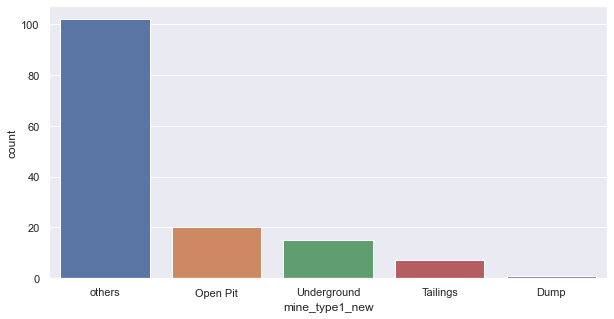

In [53]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="mine_type1_new", data=main, order=main['mine_type1_new'].value_counts().index)


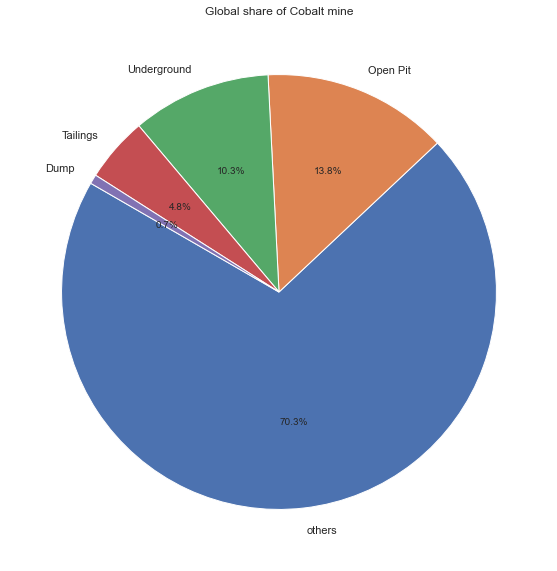

In [54]:
labels = main['mine_type1_new'].value_counts().index.tolist()
sizes = main['mine_type1_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


In [55]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(main,
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mine distribution',
                        zoom = 2,
                        radius = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [56]:
# token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['mine_type1']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mine distribution',
                        color = 'mine_type1',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [57]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['mine_type1']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mdistribution',
                        color = 'mine_type1',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


## 发展阶段

In [58]:
labels = main['dev_stage'].value_counts().index.tolist()[:9]
main.loc[:, 'dev_stage_new'] = main.loc[:, 'dev_stage']
main.loc[~main['dev_stage'].isin(labels), 'dev_stage_new'] = 'others'


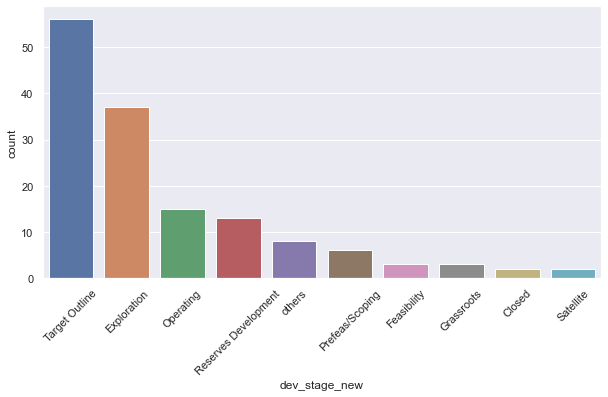

In [59]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="dev_stage_new", data=main, order=main['dev_stage_new'].value_counts().index)
t = plt.xticks(rotation=45)

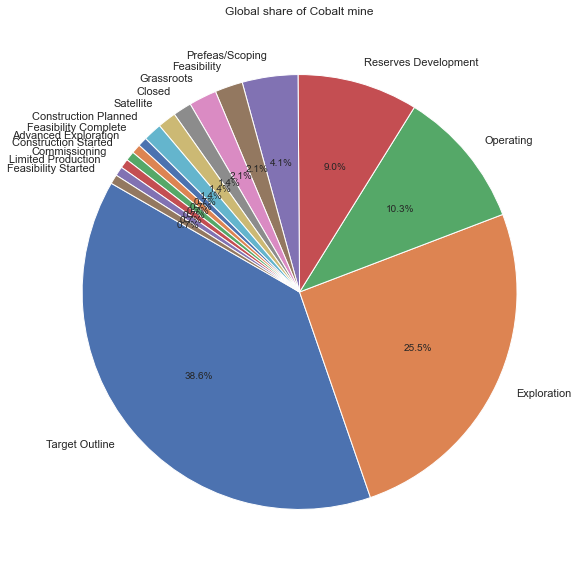

In [60]:
labels = main['dev_stage'].value_counts().index.tolist()
sizes = main['dev_stage'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


In [61]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main,
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mine distribution',
                        color = 'dev_stage_new',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


## 信息更新时间

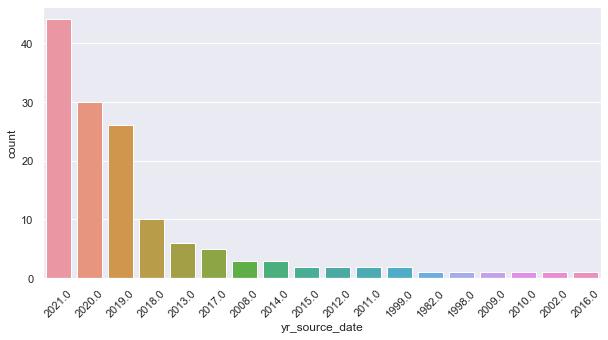

In [62]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="yr_source_date", data=main, order=main['yr_source_date'].value_counts().index)
t = plt.xticks(rotation=45)


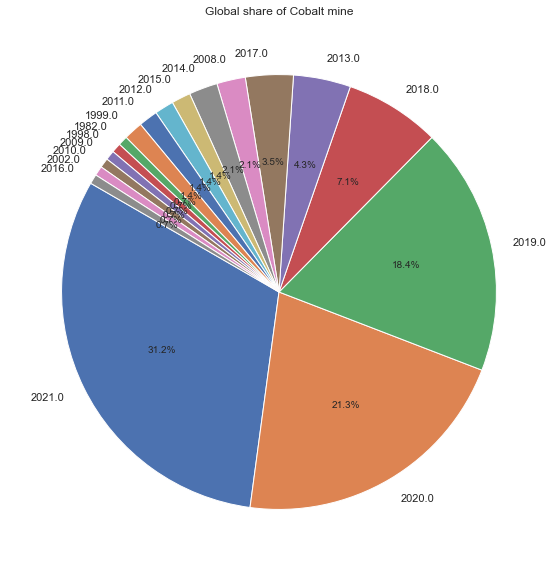

In [63]:
labels = main['yr_source_date'].value_counts().index.tolist()
sizes = main['yr_source_date'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


# 矿点地质信息

In [64]:
col = feature_dic.loc[['technology_geology']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id        zone_name geology_region geology_comments  \
6          Agaunico    79348              NaN            NaN              NaN   
11        Ahmavuoma    79220              NaN            NaN              NaN   
33  Atacama Cobalto    81398  Atacama Cobalto            NaN              NaN   
35              Aue    77703        Zschorlau            NaN              NaN   
49         Balmoral    80511              NaN            NaN              NaN   

    avg_depth_geologic_dep         geologic_ore_body_type ore_minerals  
6                      NaN                            NaN          NaN  
11                     NaN                            NaN          NaN  
33                     NaN  Iron Oxide Copper Gold (IOCG)          NaN  
35                     NaN                            NaN   Wolframite  
49                     NaN                            NaN          NaN

------------------------------------------------------------ 
缺失率统计


prop_name                   0.00
prop_id                     0.00
zone_name                  40.00
geology_region            100.00
geology_comments           68.97
avg_depth_geologic_dep     97.93
geologic_ore_body_type     65.52
ore_minerals               64.14
dtype: object

矿石类型的分布

In [65]:
temp = main['geologic_ore_body_type'].str.split(',', expand=True).add_prefix('geologic_ore_body_type')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / main[main['geologic_ore_body_type'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['geologic_ore_body_type', 'count']

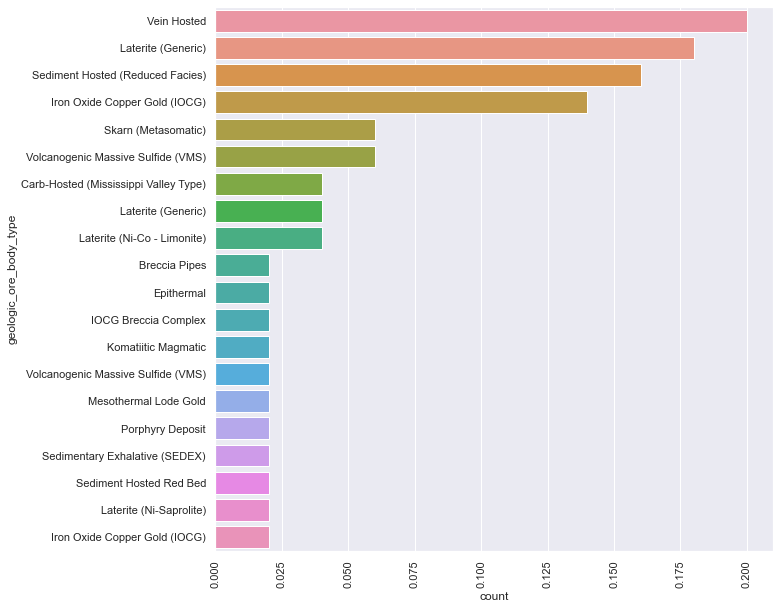

In [66]:
t = plt.figure(figsize=(10, 10))
ax = sns.barplot(y="geologic_ore_body_type", x='count', data=temp, orient='h')
t = plt.xticks(rotation=90)


In [67]:
main['temp'] = main['geologic_ore_body_type'].str.contains('Laterite')

token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['temp']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mdistribution',
                        color = 'temp',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [68]:
main['temp'] = main['geologic_ore_body_type'].str.contains('Intrusion')

token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(main.dropna(subset=['temp']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mdistribution',
                        color = 'temp',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


矿石矿物质的分布

In [69]:
temp = main['ore_minerals'].str.split(',', expand=True).add_prefix('ore_minerals')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / main[main['ore_minerals'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['ore_minerals', 'count']


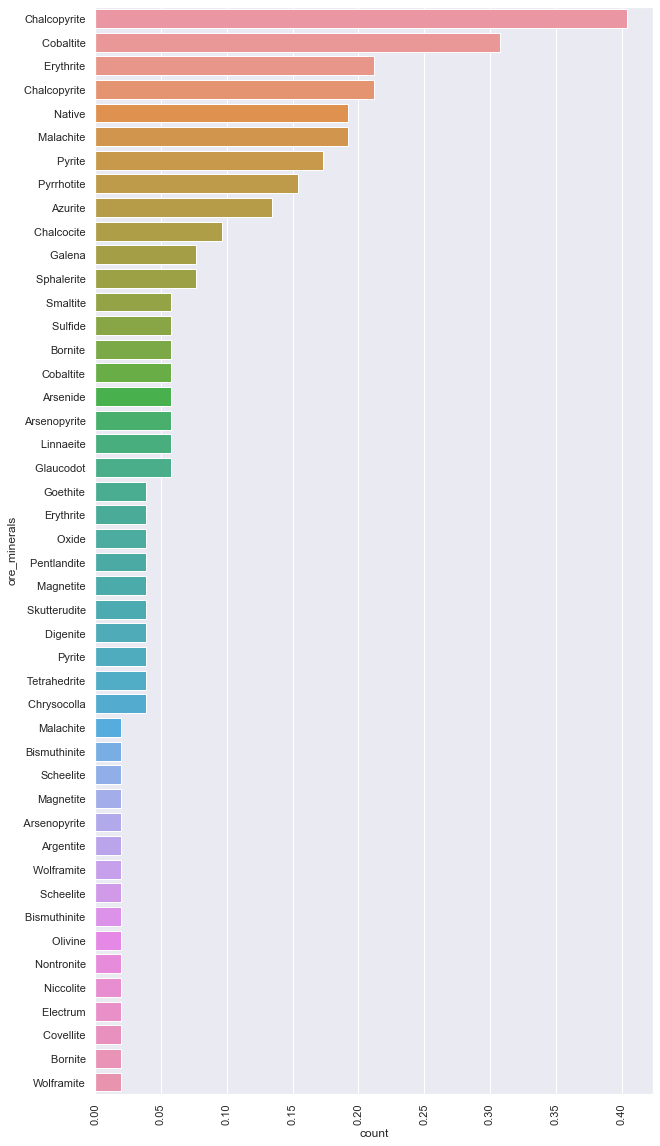

In [70]:
t = plt.figure(figsize=(10, 20))
ax = sns.barplot(y="ore_minerals", x='count', data=temp, orient='h')
t = plt.xticks(rotation=90)


# 矿点所有权

In [71]:
labels = main['owner_country'].value_counts().index.tolist()[:9]
main.loc[:, 'owner_country_new'] = main.loc[:, 'owner_country']
main.loc[~main['owner_country'].isin(labels), 'owner_country_new'] = 'others'


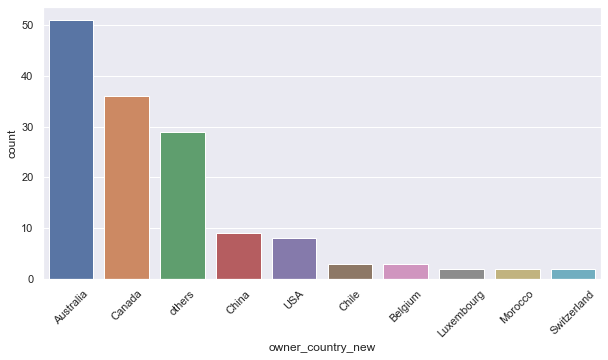

In [72]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="owner_country_new", data=main, order=main['owner_country_new'].value_counts().index)
t = plt.xticks(rotation=45)

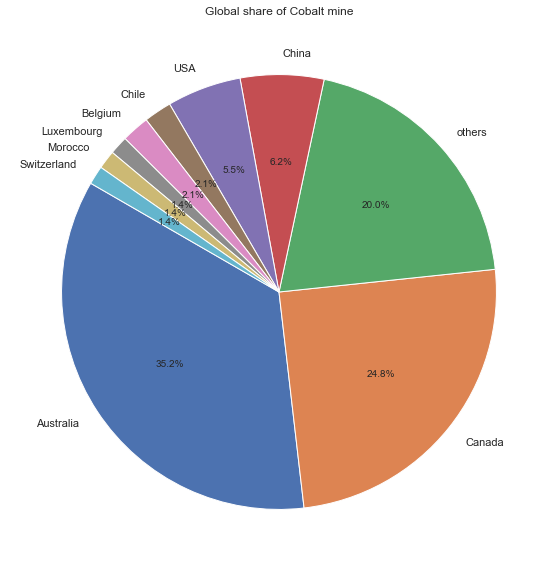

In [73]:
labels = main['owner_country_new'].value_counts().index.tolist()
sizes = main['owner_country_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


In [74]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main.dropna(subset=['owner_pct', 'owner_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'owner_country_new',
                        title = 'Cobalt mine distribution',
                        zoom = 2,
                        size_max = 10,
                        size = 'owner_pct',
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

矿点所有者数量的分布


<AxesSubplot:>

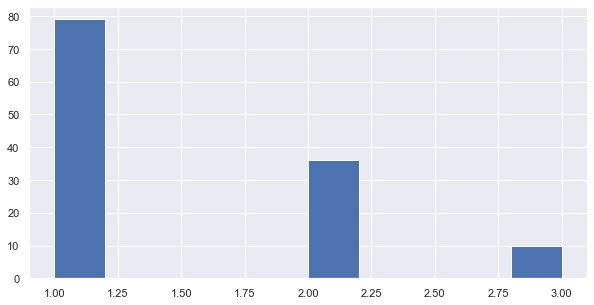

In [75]:
print('矿点所有者数量的分布')
main['num_royalty_owners'].hist(figsize=(10, 5))

In [76]:
import re
from collections import Counter
def extract(x):
    if not pd.isna(x):
        x = x.replace(',', '.')
        pct_lst = re.findall(r'\d+%', str(x))
        x = re.sub(r'[\d+%]', '', re.sub(r'\(.*?\)', '', str(x)))
        x_lst = x.split(';')
        x_lst = [i.replace('.', '').lstrip(" ").rstrip(" ") for i in x_lst]
        return x_lst#, pct_lst
    else:
        return None
    

In [77]:
main['owner_list_new'] = main['owner_list'].map(extract)
temp = []
for i in main['owner_list_new']:
    if i is not None:
        temp += i
        

In [78]:
temp = pd.Series(Counter(temp)).sort_values(ascending=False).reset_index().head(20)
temp.columns = ['company', 'count']


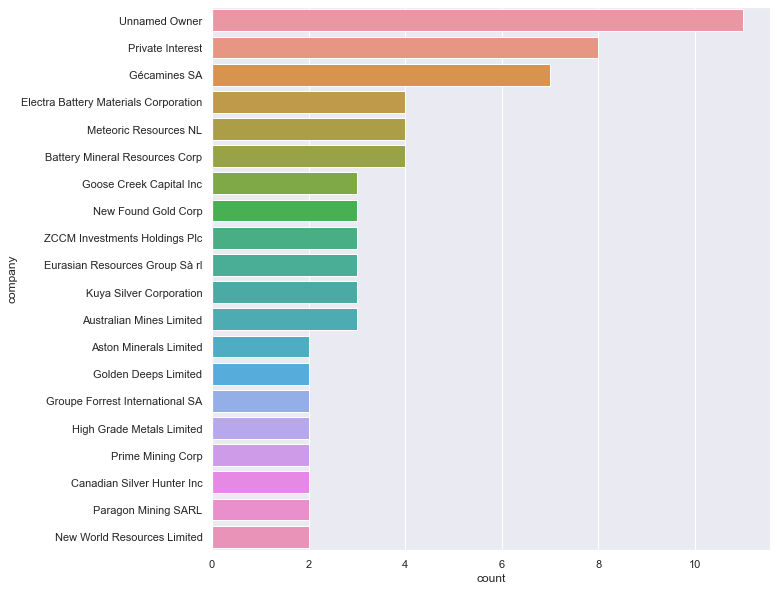

In [79]:
t = plt.figure(figsize=(10, 10))
t = sns.barplot(y='company', x='count', data=temp, orient='h')


# 最近一笔股份交易

In [80]:
col = feature_dic.loc[['transaction_details_1', 'transaction_details_2']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id   jv  deal_pct_acquired_announcement  \
6          Agaunico    79348  NaN                             NaN   
11        Ahmavuoma    79220  NaN                             NaN   
33  Atacama Cobalto    81398   No                           100.0   
35              Aue    77703  NaN                             NaN   
49         Balmoral    80511  NaN                             NaN   

    deal_pct_acquired_completion  total_deal_value_announcement  \
6                            NaN                            NaN   
11                           NaN                            NaN   
33                           NaN                       3.193478   
35                           NaN                            NaN   
49                           NaN                            NaN   

    total_deal_value_completion rptd_currency_code                   buyer  \
6                           NaN                NaN                     NaN   
11                          NaN                NaN                     NaN   
33                          NaN                CLP  Surge Exploration Inc.   
35                          NaN                NaN                     NaN   
49                          NaN                NaN                     NaN   

   buyer_country    seller seller_country        prop_name  prop_id  \
6            NaN       NaN            NaN         Agaunico    79348   
11           NaN       NaN            NaN        Ahmavuoma    79220   
33        Canada  CAP S.A.          Chile  Atacama Cobalto    81398   
35           NaN       NaN            NaN              Aue    77703   
49           NaN       NaN            NaN         Balmoral    80511   

                    buyer_name_target_name                 deal_type  \
6                                      NaN                       NaN   
11                                     NaN                       NaN   
33  Surge Exploration Inc./Atacama project  Metals & Mining Property   
35                                     NaN                       NaN   
49                                     NaN                       NaN   

             target target_country announce_date  deal_status  \
6               NaN            NaN           NaT          NaN   
11              NaN            NaN           NaT          NaN   
33  Atacama project          Chile    2018-07-24  Termination   
35              NaN            NaN           NaT          NaN   
49              NaN            NaN           NaT          NaN   

   completion_termination_date deal_consideration earn_in  
6                          NaT                NaN     NaN  
11                         NaT                NaN     NaN  
33                  2019-04-23                NaN     Yes  
35                         NaT                NaN     NaN  
49                         NaT                NaN     NaN

------------------------------------------------------------ 
缺失率统计


prop_name                          0.00
prop_id                            0.00
jv                                37.24
deal_pct_acquired_announcement    42.76
deal_pct_acquired_completion      64.14
total_deal_value_announcement     49.66
total_deal_value_completion       68.28
rptd_currency_code                37.24
buyer                             37.24
buyer_country                     50.34
seller                            37.24
seller_country                    54.48
prop_name                          0.00
prop_id                            0.00
buyer_name_target_name            37.24
deal_type                         37.24
target                            37.24
target_country                    39.31
announce_date                     37.24
deal_status                       37.24
completion_termination_date       47.59
deal_consideration                54.48
earn_in                           37.24
dtype: object

## 卖方

In [81]:
labels = main['seller_country'].value_counts().index.tolist()[:9]
main.loc[:, 'seller_country_new'] = main.loc[:, 'seller_country']
main.loc[~main['seller_country'].isin(labels), 'seller_country_new'] = 'others'


In [82]:
print('------------'*5, '\n矿点卖方国家的分布')


------------------------------------------------------------ 
矿点卖方国家的分布


In [83]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main.dropna(subset=['seller_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'seller_country_new',
                        title = 'Cobalt mine distribution',
                        zoom = 2,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


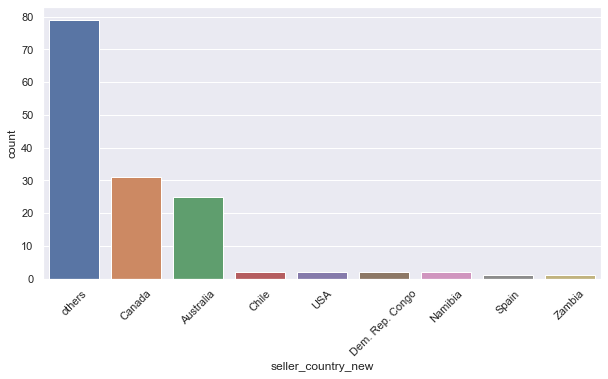

In [84]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="seller_country_new", data=main, order=main['seller_country_new'].value_counts().index)
t = plt.xticks(rotation=45)


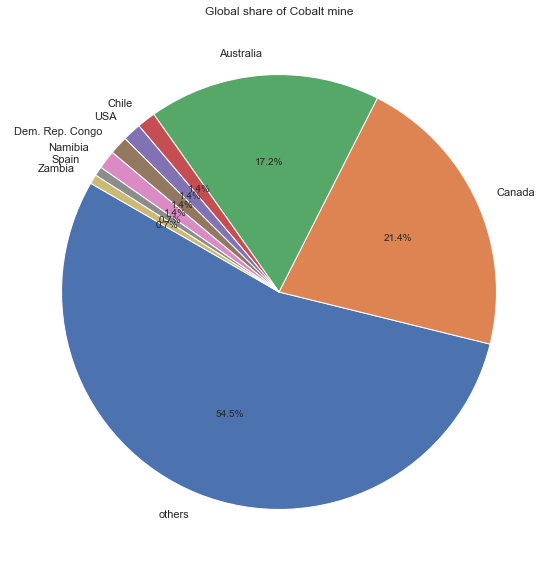

In [85]:
labels = main['seller_country_new'].value_counts().index.tolist()
sizes = main['seller_country_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


## 买方

In [86]:
labels = main['buyer_country'].value_counts().index.tolist()[:9]
main.loc[:, 'buyer_country_new'] = main.loc[:, 'buyer_country']
main.loc[~main['buyer_country'].isin(labels), 'buyer_country_new'] = 'others'


In [87]:
print('------------'*5, '\n矿点买方国家的分布')


------------------------------------------------------------ 
矿点买方国家的分布


In [88]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main.dropna(subset=['buyer_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'buyer_country_new',
                        title = 'Cobalt mine distribution',
                        zoom = 2,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

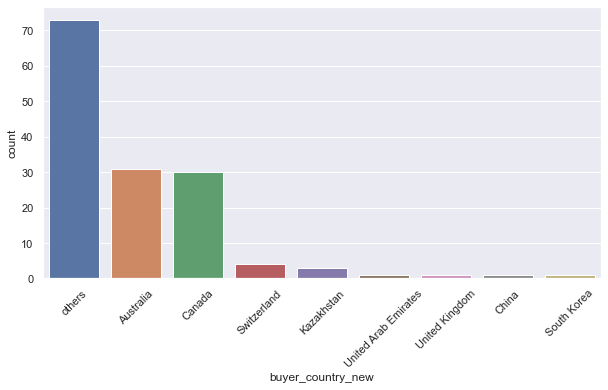

In [89]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="buyer_country_new", data=main, order=main['buyer_country_new'].value_counts().index)
t = plt.xticks(rotation=45)


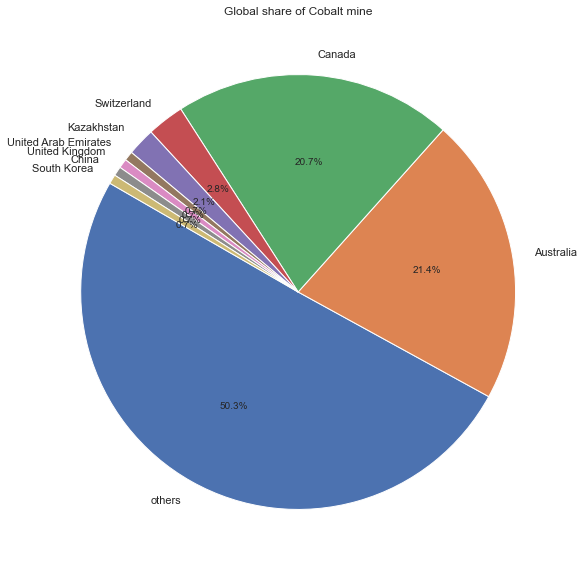

In [90]:
labels = main['buyer_country_new'].value_counts().index.tolist()
sizes = main['buyer_country_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of Cobalt mine")


In [91]:
print('------------'*5, '\n矿点卖方-买房配对的数量统计')
main.apply(lambda x: str(x['seller_country']) + '_' + str(x['buyer_country']), axis=1).value_counts().head(10)

------------------------------------------------------------ 
矿点卖方-买房配对的数量统计


nan_nan                59
Canada_Canada          16
Australia_Australia    14
nan_Canada             10
Australia_nan           9
nan_Australia           6
Canada_nan              5
Canada_Switzerland      4
Canada_Australia        4
nan_Kazakhstan          3
dtype: int64

# 矿点运营方

In [92]:
col = feature_dic.loc[['operator_1', 'operator_2']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id                      operator_name  \
6          Agaunico    79348                      Unnamed Owner   
11        Ahmavuoma    79220                                NaN   
33  Atacama Cobalto    81398  Compañía Minera del Pacífico S.A.   
35              Aue    77703               Vital Metals Limited   
49         Balmoral    80511          Artemis Resources Limited   

    operator_snl_instn_key             operator_common_name  \
6                4400798.0                    Unnamed Owner   
11                     NaN                              NaN   
33               4349387.0  Compañía Minera del Pacífico SA   
35               4355245.0                Vital Metals Ltd.   
49               4348189.0           Artemis Resources Ltd.   

   operator_company_name_abbrev operator_date_closing_price  operator_mkt_cap  \
6                 Unnamed Owner                         NaT               NaN   
11                          NaN                         NaT               NaN   
33               Cia Minera del                         NaT               NaN   
35                 Vital Metals                  2021-12-07        152.678593   
49            Artemis Resources                  2021-12-07         64.576604   

   operator_price_to_ltm_eps  operator_tev        prop_name  prop_id  \
6                        NaN           NaN         Agaunico    79348   
11                       NaN           NaN        Ahmavuoma    79220   
33                       NaN           NaN  Atacama Cobalto    81398   
35                       NaN    128.189272              Aue    77703   
49                       NaN     58.174264         Balmoral    80511   

   operator_tev_to_ltm_ebitda operator_total_debt_to_total_cap  \
6                         NaN                              NaN   
11                        NaN                              NaN   
33                        NaN                              NaN   
35                         NM                              NaN   
49                         NM                              NaN   

   operator_price_to_earn_after_extra operator_tev_to_ebitda  \
6                                 NaN                    NaN   
11                                NaN                    NaN   
33                                NaN                    NaN   
35                                 NM                     NM   
49                                 NM                     NM   

   operator_period_ended  operator_working_capital  operator_total_cap_at_bv  \
6                    NaT                       NaN                       NaN   
11                   NaT                       NaN                       NaN   
33                   NaT                       NaN                       NaN   
35            2021-09-30                       NaN                       NaN   
49            2021-09-30                       NaN                       NaN   

    operator_total_debt  operator_current_liab  
6                   NaN                    NaN  
11                  NaN                    NaN  
33                  NaN                    NaN  
35                  NaN                    NaN  
49                  NaN                    NaN

------------------------------------------------------------ 
缺失率统计


prop_name                              0.00
prop_id                                0.00
operator_name                         15.17
operator_snl_instn_key                15.17
operator_common_name                  15.17
operator_company_name_abbrev          15.86
operator_date_closing_price           41.38
operator_mkt_cap                      40.69
operator_price_to_ltm_eps             74.48
operator_tev                          44.83
prop_name                              0.00
prop_id                                0.00
operator_tev_to_ltm_ebitda            50.34
operator_total_debt_to_total_cap      70.34
operator_price_to_earn_after_extra    46.21
operator_tev_to_ebitda                46.21
operator_period_ended                 40.00
operator_working_capital              66.90
operator_total_cap_at_bv              66.90
operator_total_debt                   66.90
operator_current_liab                 66.90
dtype: object

# 矿点承包商

In [93]:
col = feature_dic.loc[['contractor']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id  contractor_id  \
6          Agaunico    79348            NaN   
11        Ahmavuoma    79220            NaN   
33  Atacama Cobalto    81398            NaN   
35              Aue    77703      4996275.0   
49         Balmoral    80511      4480939.0   

                                      contractor_name contractor_hq  begin_yr  \
6                                                 NaN           NaN       NaN   
11                                                NaN           NaN       NaN   
33                                                NaN           NaN       NaN   
35                                        ALS Limited            AU    2018.0   
49  Commonwealth Scientific & Industrial Research ...           NaN    2018.0   

    begin_mo  end_yr  end_mo  proj_end_yr  proj_end_mo  \
6        NaN     NaN     NaN          NaN          NaN   
11       NaN     NaN     NaN          NaN          NaN   
33       NaN     NaN     NaN          NaN          NaN   
35       5.0  2020.0     3.0          NaN          NaN   
49       8.0     NaN     NaN          NaN          NaN   

   contractor_last_verified  
6                       NaT  
11                      NaT  
33                      NaT  
35                      NaT  
49                      NaT

------------------------------------------------------------ 
缺失率统计


prop_name                     0.00
prop_id                       0.00
contractor_id                43.45
contractor_name              43.45
contractor_hq                44.83
begin_yr                     62.07
begin_mo                     67.59
end_yr                       86.90
end_mo                       88.28
proj_end_yr                  99.31
proj_end_mo                  99.31
contractor_last_verified    100.00
dtype: object

# 矿点土地税

In [94]:
col = feature_dic.loc[['royalty_detail']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id royalty_name  royalty_snl_instn_key royalty_type  \
6          Agaunico    79348          NaN                    NaN          NaN   
11        Ahmavuoma    79220          NaN                    NaN          NaN   
33  Atacama Cobalto    81398          NaN                    NaN          NaN   
35              Aue    77703          NaN                    NaN          NaN   
49         Balmoral    80511          NaN                    NaN          NaN   

    royalty_pct royalty_holder_hq royalty_holder_country  \
6           NaN               NaN                    NaN   
11          NaN               NaN                    NaN   
33          NaN               NaN                    NaN   
35          NaN               NaN                    NaN   
49          NaN               NaN                    NaN   

   royalty_holder_global_region royalty_holder_phone royalty_holder_website  
6                           NaN                  NaN                    NaN  
11                          NaN                  NaN                    NaN  
33                          NaN                  NaN                    NaN  
35                          NaN                  NaN                    NaN  
49                          NaN                  NaN                    NaN

------------------------------------------------------------ 
缺失率统计


prop_name                        0.00
prop_id                          0.00
royalty_name                    75.17
royalty_snl_instn_key           75.17
royalty_type                    75.17
royalty_pct                     87.59
royalty_holder_hq               84.83
royalty_holder_country          75.86
royalty_holder_global_region    75.86
royalty_holder_phone            88.97
royalty_holder_website          88.97
dtype: object

# 资金成本

In [95]:
col = feature_dic.loc[['capital_cost']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id  amt_capital_invested  \
6          Agaunico    79348                   NaN   
11        Ahmavuoma    79220                   NaN   
33  Atacama Cobalto    81398                   NaN   
35              Aue    77703                   NaN   
49         Balmoral    80511                   NaN   

   capital_cost_announced_date capital_cost_proj_completion_date  \
6                          NaT                               NaT   
11                         NaT                               NaT   
33                         NaT                               NaT   
35                         NaT                               NaT   
49                         NaT                               NaT   

   capital_cost_completion_date capital_cost_type capital_cost_comments  \
6                           NaT               NaN                   NaN   
11                          NaT               NaN                   NaN   
33                          NaT               NaN                   NaN   
35                          NaT               NaN                   NaN   
49                          NaT               NaN                   NaN   

    capital_improvement_yr  
6                      NaN  
11                     NaN  
33                     NaN  
35                     NaN  
49                     NaN

------------------------------------------------------------ 
缺失率统计


prop_name                              0.00
prop_id                                0.00
amt_capital_invested                  86.21
capital_cost_announced_date           84.83
capital_cost_proj_completion_date    100.00
capital_cost_completion_date          98.62
capital_cost_type                     84.83
capital_cost_comments                 86.21
capital_improvement_yr                84.83
dtype: object

------------------------------------------------------------ 
矿点的资金投入额的分布


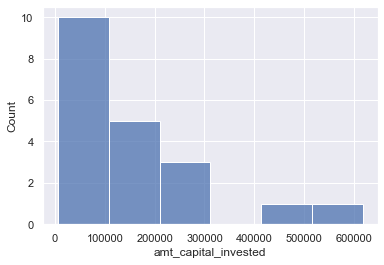

In [96]:
print('------------'*5, '\n矿点的资金投入额的分布')
t = sns.histplot(data=main, x='amt_capital_invested')

In [97]:
print('------------'*5, '\n矿点资金投入的地域分布')


------------------------------------------------------------ 
矿点资金投入的地域分布


In [98]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['amt_capital_invested'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
#                         color = 'buyer_country_new',
                        title = 'Cobalt mine distribution',
                        zoom = 2,
                        size = 'amt_capital_invested',
                        size_max = 40,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [99]:
print('------------'*5, '\n矿点资金投入类型的地域分布')


------------------------------------------------------------ 
矿点资金投入类型的地域分布


In [100]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['capital_cost_type'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'capital_cost_type',
                        title = 'Cobalt mine distribution',
                        zoom = 2,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

# 矿石产能

In [101]:
col = feature_dic.loc[['ore_capacity_1', 'ore_capacity_2']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id primary_commodity  start_up_yr  \
6          Agaunico    79348            Cobalt          NaN   
11        Ahmavuoma    79220            Cobalt          NaN   
33  Atacama Cobalto    81398            Cobalt          NaN   
35              Aue    77703            Cobalt          NaN   
49         Balmoral    80511            Cobalt          NaN   

    start_up_calendar_qtr  proj_start_up_yr  proj_start_up_qtr  \
6                     NaN               NaN                NaN   
11                    NaN               NaN                NaN   
33                    NaN               NaN                NaN   
35                    NaN               NaN                NaN   
49                    NaN               NaN                NaN   

    actual_closure_yr  actual_closure_qtr  proj_closure_yr  proj_closure_qtr  \
6                 NaN                 NaN              NaN               NaN   
11                NaN                 NaN              NaN               NaN   
33                NaN                 NaN              NaN               NaN   
35                NaN                 NaN              NaN               NaN   
49                NaN                 NaN              NaN               NaN   

    mill_capacity_tonnes_per_day  mill_capacity_tonnes_per_year  \
6                            NaN                            NaN   
11                           NaN                            NaN   
33                           NaN                            NaN   
35                           NaN                            NaN   
49                           NaN                            NaN   

    mill_capacity_cubic_m_per_day  mill_capacity_cubic_m_per_year  \
6                             NaN                             NaN   
11                            NaN                             NaN   
33                            NaN                             NaN   
35                            NaN                             NaN   
49                            NaN                             NaN   

          prop_name  prop_id  stripping_ratio  waste_to_ore_ratio  \
6          Agaunico    79348              NaN                 NaN   
11        Ahmavuoma    79220              NaN                 NaN   
33  Atacama Cobalto    81398              NaN                 NaN   
35              Aue    77703              NaN                 NaN   
49         Balmoral    80511              NaN                 NaN   

   mining_methods processing_methods production_forms  \
6             NaN                NaN              NaN   
11            NaN                NaN              NaN   
33            NaN                NaN              NaN   
35            NaN                NaN              NaN   
49            NaN                NaN              NaN   

    mining_processing_cost_per_metric_tonne  \
6                                       NaN   
11                                      NaN   
33                                      NaN   
35                                      NaN   
49                                      NaN   

    mining_processing_cost_per_cubic_m  
6                                  NaN  
11                                 NaN  
33                                 NaN  
35                                 NaN  
49                                 NaN

------------------------------------------------------------ 
缺失率统计


prop_name                                    0.00
prop_id                                      0.00
primary_commodity                            0.00
start_up_yr                                 91.03
start_up_calendar_qtr                       95.17
proj_start_up_yr                            91.03
proj_start_up_qtr                           96.55
actual_closure_yr                           97.24
actual_closure_qtr                          99.31
proj_closure_yr                             93.79
proj_closure_qtr                            99.31
mill_capacity_tonnes_per_day                87.59
mill_capacity_tonnes_per_year               86.90
mill_capacity_cubic_m_per_day              100.00
mill_capacity_cubic_m_per_year             100.00
prop_name                                    0.00
prop_id                                      0.00
stripping_ratio                             96.55
waste_to_ore_ratio                         100.00
mining_methods                              81.38


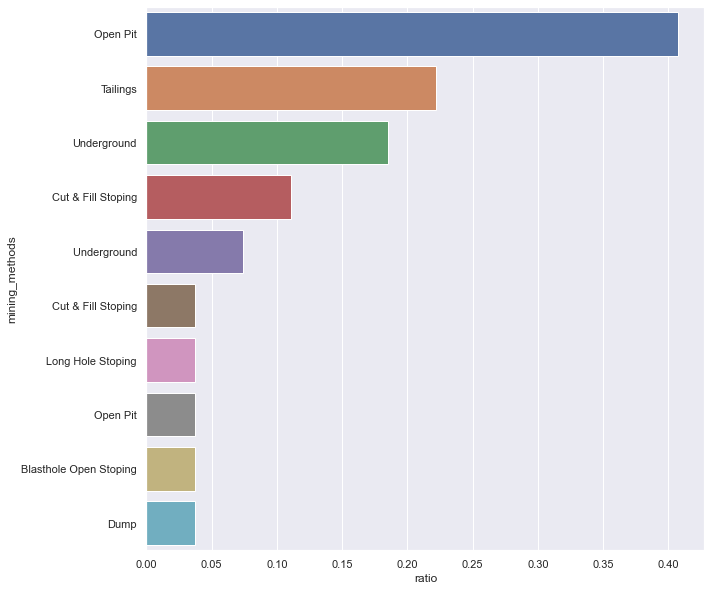

In [102]:
temp = main['mining_methods'].str.split(',', expand=True).add_prefix('mining_methods')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / main[main['mining_methods'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['mining_methods', 'ratio']
temp = temp[temp['ratio']>0.01]

t = plt.figure(figsize=(10, 10))
t = sns.barplot(data=temp, y='mining_methods', x='ratio', orient='h')

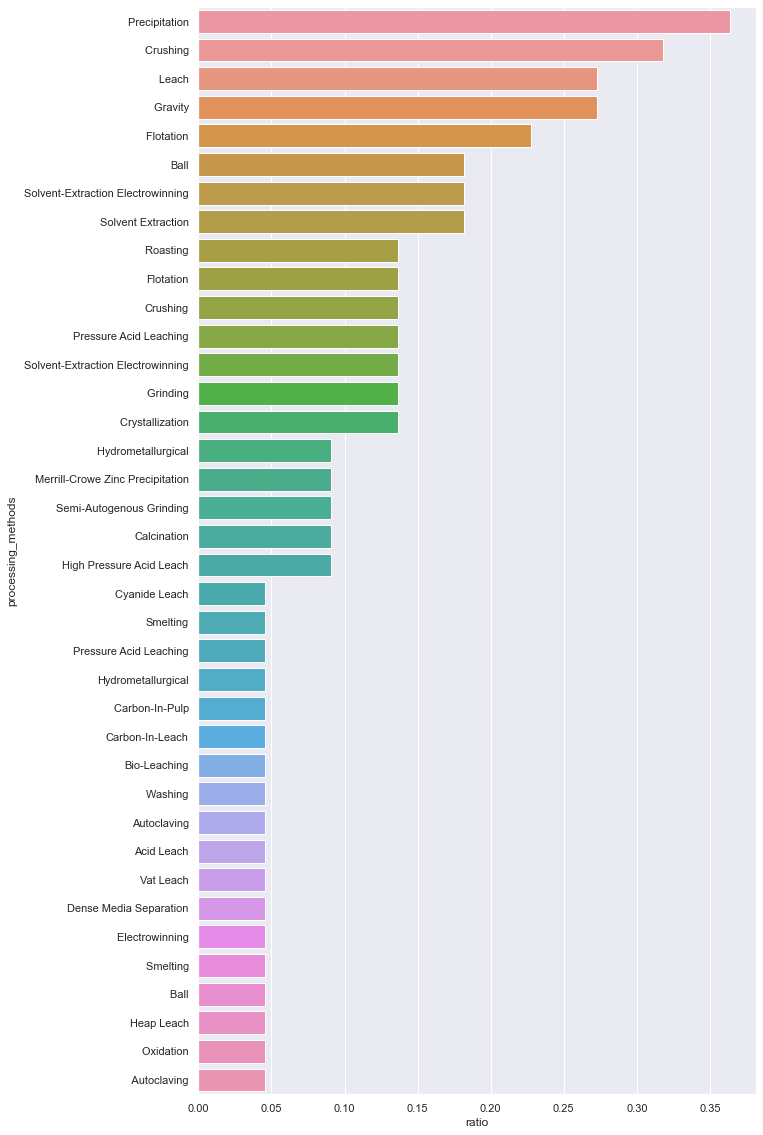

In [103]:
temp = main['processing_methods'].str.split(',', expand=True).add_prefix('processing_methods')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / main[main['processing_methods'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['processing_methods', 'ratio']
temp = temp[temp['ratio']>0.01]

t = plt.figure(figsize=(10, 20))
t = sns.barplot(data=temp, y='processing_methods', x='ratio', orient='h')

------------------------------------------------------------ 
矿点产出矿物形式的分布


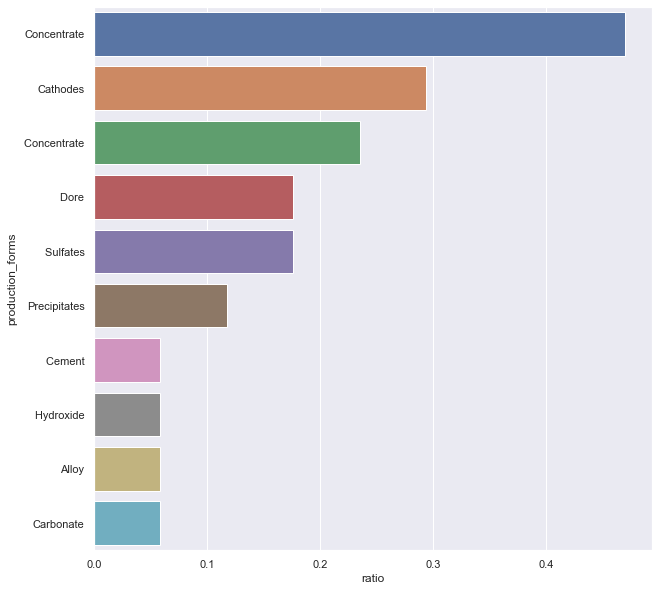

In [104]:
print('------------'*5, '\n矿点产出矿物形式的分布')

temp = main['production_forms'].str.split(',', expand=True).add_prefix('production_forms')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / main[main['production_forms'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['production_forms', 'ratio']
temp = temp[temp['ratio']>0.01]

t = plt.figure(figsize=(10, 10))
t = sns.barplot(data=temp, y='production_forms', x='ratio', orient='h')

In [105]:
print('------------'*5, '\n矿点日产能数额的分布')


------------------------------------------------------------ 
矿点日产能数额的分布


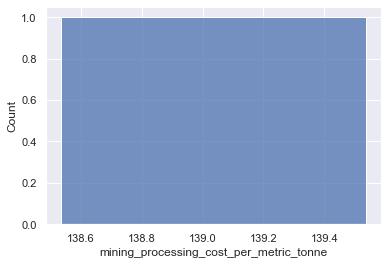

In [106]:
t = sns.histplot(main, x='mining_processing_cost_per_metric_tonne')

In [107]:
print('------------'*5, '\n矿点日产能数额的国家分布')

temp = main.groupby('country_name')['mining_processing_cost_per_metric_tonne'].mean().dropna().sort_values().to_frame()
temp.style.background_gradient()

------------------------------------------------------------ 
矿点日产能数额的国家分布


In [108]:
print('------------'*5, '\n矿点日产能的地域分布')


------------------------------------------------------------ 
矿点日产能的地域分布


In [109]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main,
                        lon = 'longitude',
                        lat = 'latitude',
#                         color = 'actv_status',
                        title = 'Cobalt mine distribution',
                        zoom = 2,
                        size = main['mill_capacity_tonnes_per_day'].fillna(0),
                        hover_data = ['mill_capacity_tonnes_per_day'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

# 商品产能

In [110]:
col = feature_dic.loc[['commodity_capacity_1', 'commodity_capacity_2']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id  millhead_grade_g_per_tonne  \
6          Agaunico    79348                         NaN   
11        Ahmavuoma    79220                         NaN   
33  Atacama Cobalto    81398                         NaN   
35              Aue    77703                         NaN   
49         Balmoral    80511                         NaN   

    millhead_grade_g_per_cubic_m  millhead_grade_pct  \
6                            NaN                 NaN   
11                           NaN                 NaN   
33                           NaN                 NaN   
35                           NaN                 NaN   
49                           NaN                 NaN   

    millhead_grade_ct_per_tonne  millhead_grade_ct_per_cubic_m  recov_rate  \
6                           NaN                            NaN         NaN   
11                          NaN                            NaN         NaN   
33                          NaN                            NaN         NaN   
35                          NaN                            NaN         NaN   
49                          NaN                            NaN         NaN   

    production_capacity_oz  production_capacity_tonne  production_capacity_lb  \
6                      NaN                        NaN                     NaN   
11                     NaN                        NaN                     NaN   
33                     NaN                        NaN                     NaN   
35                     NaN                        NaN                     NaN   
49                     NaN                        NaN                     NaN   

    production_capacity_ct        prop_name  prop_id  cash_cost_per_oz  \
6                      NaN         Agaunico    79348               NaN   
11                     NaN        Ahmavuoma    79220               NaN   
33                     NaN  Atacama Cobalto    81398               NaN   
35                     NaN              Aue    77703               NaN   
49                     NaN         Balmoral    80511               NaN   

    cash_cost_per_tonne  cash_cost_per_lb  cash_cost_per_ct  \
6                   NaN               NaN               NaN   
11                  NaN               NaN               NaN   
33                  NaN               NaN               NaN   
35                  NaN               NaN               NaN   
49                  NaN               NaN               NaN   

    total_production_cost_per_oz  total_production_cost_per_tonne  \
6                            NaN                              NaN   
11                           NaN                              NaN   
33                           NaN                              NaN   
35                           NaN                              NaN   
49                           NaN                              NaN   

    total_production_cost_per_lb  total_production_cost_per_ct  \
6                            NaN                           NaN   
11                           NaN                           NaN   
33                           NaN                           NaN   
35                           NaN                           NaN   
49                           NaN                           NaN   

    all_in_sustaining_cost_per_oz  all_in_sustaining_cost_per_tonne  \
6                             NaN                               NaN   
11                            NaN                               NaN   
33                            NaN                               NaN   
35                            NaN                               NaN   
49                            NaN                               NaN   

    all_in_sustaining_cost_per_lb  all_in_sustaining_cost_per_ct  
6                             NaN                            NaN  
11                            NaN                            NaN  
33                            NaN                            NaN  
35                       

------------------------------------------------------------ 
缺失率统计


prop_name                             0.00
prop_id                               0.00
millhead_grade_g_per_tonne          100.00
millhead_grade_g_per_cubic_m        100.00
millhead_grade_pct                  100.00
millhead_grade_ct_per_tonne         100.00
millhead_grade_ct_per_cubic_m       100.00
recov_rate                          100.00
production_capacity_oz               98.62
production_capacity_tonne           100.00
production_capacity_lb              100.00
production_capacity_ct              100.00
prop_name                             0.00
prop_id                               0.00
cash_cost_per_oz                    100.00
cash_cost_per_tonne                 100.00
cash_cost_per_lb                    100.00
cash_cost_per_ct                    100.00
total_production_cost_per_oz        100.00
total_production_cost_per_tonne     100.00
total_production_cost_per_lb        100.00
total_production_cost_per_ct        100.00
all_in_sustaining_cost_per_oz       100.00
all_in_sust

缺失率过高，无法使用

# 矿产储量

In [111]:
col = feature_dic.loc[['tonnage_and_volume']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id primary_commodity r_and_r_as_of  \
6          Agaunico    79348            Cobalt           NaT   
11        Ahmavuoma    79220            Cobalt           NaT   
33  Atacama Cobalto    81398            Cobalt           NaT   
35              Aue    77703            Cobalt           NaT   
49         Balmoral    80511            Cobalt           NaT   

    resv_ore_tonnage  meas_ind_ore_tonnage  inf_resrc_ore_tonnage  \
6                NaN                   NaN                    NaN   
11               NaN                   NaN                    NaN   
33               NaN                   NaN                    NaN   
35               NaN                   NaN                    NaN   
49               NaN                   NaN                    NaN   

    total_resrc_ore_tonnage  r_and_r_ore_tonnage  \
6                       NaN                  NaN   
11                      NaN                  NaN   
33                      NaN                  NaN   
35                      NaN                  NaN   
49                      NaN                  NaN   

    meas_ind_ore_tonnage_incl_resv  
6                              NaN  
11                             NaN  
33                             NaN  
35                             NaN  
49                             NaN

------------------------------------------------------------ 
缺失率统计


prop_name                          0.00
prop_id                            0.00
primary_commodity                  0.00
r_and_r_as_of                     73.10
resv_ore_tonnage                  76.55
meas_ind_ore_tonnage              83.45
inf_resrc_ore_tonnage             83.45
total_resrc_ore_tonnage           77.24
r_and_r_ore_tonnage               76.55
meas_ind_ore_tonnage_incl_resv    82.76
dtype: object

In [112]:
print('------------'*5, '\n矿点储量地域分布的散点图')

------------------------------------------------------------ 
矿点储量地域分布的散点图


In [114]:
# token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

# fig = px.scatter_mapbox(main,
#                         lon = 'longitude',
#                         lat = 'latitude',
#                         color = 'actv_status',
#                         title = 'Cobalt mine distribution',
#                         zoom = 2,
#                         size = main['r_and_r_ore_tonnage'].fillna(0),
#                         hover_data = ['r_and_r_ore_tonnage'],
# #                         animation_frame='actv_status',
#                         color_continuous_scale = px.colors.carto.Temps )
# fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
#                  title = dict(x=0.5,xref='paper'),
#                  margin={'l':10,"r":0,'t':50,'b':10})


In [115]:
print('------------'*5, '\n矿点储量地域分布的热点图')


------------------------------------------------------------ 
矿点储量地域分布的热点图


In [116]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.density_mapbox(main,
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mine distribution',
                        zoom = 2,
                        z = 'r_and_r_ore_tonnage',
                        radius = 20,
                        hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


# 矿石品位

In [117]:
col = feature_dic.loc[['grade_and_contained']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))

------------------------------------------------------------ 
示例


prop_name  prop_id  grd_resv_g_per_tonne  \
6          Agaunico    79348                   NaN   
11        Ahmavuoma    79220                   NaN   
33  Atacama Cobalto    81398                   NaN   
35              Aue    77703                   NaN   
49         Balmoral    80511                   NaN   

    contained_resv_oz_g_per_tonne  grd_meas_ind_g_per_tonne  \
6                             NaN                       NaN   
11                            NaN                       NaN   
33                            NaN                       NaN   
35                            NaN                       NaN   
49                            NaN                       NaN   

    contained_meas_ind_oz_g_per_tonne  grd_inf_g_per_tonne  \
6                                 NaN                  NaN   
11                                NaN                  NaN   
33                                NaN                  NaN   
35                                NaN                  NaN   
49                                NaN                  NaN   

    contained_inf_oz_g_per_tonne  grd_total_resrc_g_per_tonne  \
6                            NaN                          NaN   
11                           NaN                          NaN   
33                           NaN                          NaN   
35                           NaN                          NaN   
49                           NaN                          NaN   

    contained_total_resrc_oz_g_per_tonne  grd_r_and_r_g_per_tonne  \
6                                    NaN                      NaN   
11                                   NaN                      NaN   
33                                   NaN                      NaN   
35                                   NaN                      NaN   
49                                   NaN                      NaN   

    contained_r_and_r_oz_g_per_tonne  grd_meas_ind_incl_resv_g_per_tonne  \
6                                NaN                                 NaN   
11                               NaN                                 NaN   
33                               NaN                                 NaN   
35                               NaN                                 NaN   
49                               NaN                                 NaN   

    contained_meas_ind_incl_resv_oz_g_per_tonne  
6                                           NaN  
11                                          NaN  
33                                          NaN  
35                                          NaN  
49                                          NaN

------------------------------------------------------------ 
缺失率统计


prop_name                                       0.00
prop_id                                         0.00
grd_resv_g_per_tonne                           98.62
contained_resv_oz_g_per_tonne                  97.24
grd_meas_ind_g_per_tonne                       97.93
contained_meas_ind_oz_g_per_tonne              97.93
grd_inf_g_per_tonne                            98.62
contained_inf_oz_g_per_tonne                   97.93
grd_total_resrc_g_per_tonne                    97.24
contained_total_resrc_oz_g_per_tonne           97.24
grd_r_and_r_g_per_tonne                        97.24
contained_r_and_r_oz_g_per_tonne               97.24
grd_meas_ind_incl_resv_g_per_tonne             97.93
contained_meas_ind_incl_resv_oz_g_per_tonne    97.93
dtype: object

# 矿点世界排名

In [118]:
col = feature_dic.loc[['production_rank']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))

------------------------------------------------------------ 
示例


prop_name  prop_id  global_rank_by_commodity  \
6          Agaunico    79348                       NaN   
11        Ahmavuoma    79220                       NaN   
33  Atacama Cobalto    81398                       NaN   
35              Aue    77703                       NaN   
49         Balmoral    80511                       NaN   

    global_production_value_by_commodity  share_of_world_by_commodity  \
6                                    NaN                          NaN   
11                                   NaN                          NaN   
33                                   NaN                          NaN   
35                                   NaN                          NaN   
49                                   NaN                          NaN   

   actual_estimate_forecast as_of_date  global_rank_all_commodities  \
6                       NaN        NaT                          NaN   
11                      NaN        NaT                          NaN   
33                      NaN        NaT                          NaN   
35                      NaN        NaT                          NaN   
49                      NaN        NaT                          NaN   

    global_production_value_all_commodities  share_of_world_all_commodities  
6                                       NaN                             NaN  
11                                      NaN                             NaN  
33                                      NaN                             NaN  
35                                      NaN                             NaN  
49                                      NaN                             NaN

------------------------------------------------------------ 
缺失率统计


prop_name                                   0.00
prop_id                                     0.00
global_rank_by_commodity                   99.31
global_production_value_by_commodity       99.31
share_of_world_by_commodity                99.31
actual_estimate_forecast                   99.31
as_of_date                                 95.86
global_rank_all_commodities                95.86
global_production_value_all_commodities    95.86
share_of_world_all_commodities             95.86
dtype: object

In [119]:
print('------------'*5, '\n矿点生产价值排名的分布')


------------------------------------------------------------ 
矿点生产价值排名的分布


In [120]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['global_production_value_all_commodities'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mine distribution',
                        color = 'global_production_value_all_commodities',
                        zoom = 2,
                        size = 'global_production_value_all_commodities',
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [121]:
print('------------'*5, '\n矿点世界排名的分布')


------------------------------------------------------------ 
矿点世界排名的分布


In [122]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['global_rank_all_commodities'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mine distribution',
                        color = 'global_rank_all_commodities',
                        zoom = 2,
                        size = main['global_rank_all_commodities'].max()-main[main['global_rank_all_commodities'].notnull()]['global_rank_all_commodities']+1,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [123]:
print('------------'*5, '\n矿点配额世界排名的分布')


------------------------------------------------------------ 
矿点配额世界排名的分布


In [124]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['share_of_world_all_commodities'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mine distribution',
                        color = 'share_of_world_all_commodities',
                        zoom = 2,
                        size = 'share_of_world_all_commodities',
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


# 钻孔相关

In [125]:
col = feature_dic.loc[['drill_hole', 'drill_interval_grade']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))

------------------------------------------------------------ 
示例


prop_name  prop_id  interval_id  hole_id  date_rptd  \
6          Agaunico    79348          NaN      NaN        NaT   
11        Ahmavuoma    79220    1085827.0  04AD001 2017-10-05   
33  Atacama Cobalto    81398          NaN      NaN        NaT   
35              Aue    77703          NaN      NaN        NaT   
49         Balmoral    80511          NaN      NaN        NaT   

            rptd_by  interval   depth explor_purpose significant_interval  \
6               NaN       NaN     NaN            NaN                  NaN   
11  Talga Group Ltd      73.1  25.854    Exploration                  Yes   
33              NaN       NaN     NaN            NaN                  NaN   
35              NaN       NaN     NaN            NaN                  NaN   
49              NaN       NaN     NaN            NaN                  NaN   

   primary_interval_commodity interval_commodities  interval_value  \
6                         NaN                  NaN             NaN   
11                     Cobalt       Cobalt, Copper       5369.7798   
33                        NaN                  NaN             NaN   
35                        NaN                  NaN             NaN   
49                        NaN                  NaN             NaN   

          prop_name  prop_id  interval_grade_g_per_tonne  \
6          Agaunico    79348                         NaN   
11        Ahmavuoma    79220                         NaN   
33  Atacama Cobalto    81398                         NaN   
35              Aue    77703                         NaN   
49         Balmoral    80511                         NaN   

    grade_x_interval_g_per_tonne  interval_grade_equiv_g_per_tonne  \
6                            NaN                               NaN   
11                           NaN                               NaN   
33                           NaN                               NaN   
35                           NaN                               NaN   
49                           NaN                               NaN   

    grade_equiv_x_interval_g_per_tonne  interval_grade_pct  \
6                                  NaN                 NaN   
11                                 NaN                0.24   
33                                 NaN                 NaN   
35                                 NaN                 NaN   
49                                 NaN                 NaN   

    grade_x_interval_pct  interval_grade_equiv_pct  \
6                    NaN                       NaN   
11                17.544                  1.078317   
33                   NaN                       NaN   
35                   NaN                       NaN   
49                   NaN                       NaN   

    grade_equiv_x_interval_pct  interval_grade_ppm  grade_x_interval_ppm  \
6                          NaN                 NaN                   NaN   
11                   78.824956                 NaN                   NaN   
33                         NaN                 NaN                   NaN   
35                         NaN                 NaN                   NaN   
49                         NaN                 NaN                   NaN   

    interval_grade_equiv_ppm  grade_equiv_x_interval_ppm  
6                        NaN                         NaN  
11                       NaN                         NaN  
33                       NaN                         NaN  
35                       NaN                         NaN  
49                       NaN                         NaN

------------------------------------------------------------ 
缺失率统计


prop_name                               0.00
prop_id                                 0.00
interval_id                            61.38
hole_id                                61.38
date_rptd                              61.38
rptd_by                                61.38
interval                               61.38
depth                                  71.72
explor_purpose                         61.38
significant_interval                   61.38
primary_interval_commodity             61.38
interval_commodities                   61.38
interval_value                         61.38
prop_name                               0.00
prop_id                                 0.00
interval_grade_g_per_tonne             88.28
grade_x_interval_g_per_tonne           88.28
interval_grade_equiv_g_per_tonne       88.28
grade_equiv_x_interval_g_per_tonne     88.28
interval_grade_pct                     78.62
grade_x_interval_pct                   78.62
interval_grade_equiv_pct               78.62
grade_equi

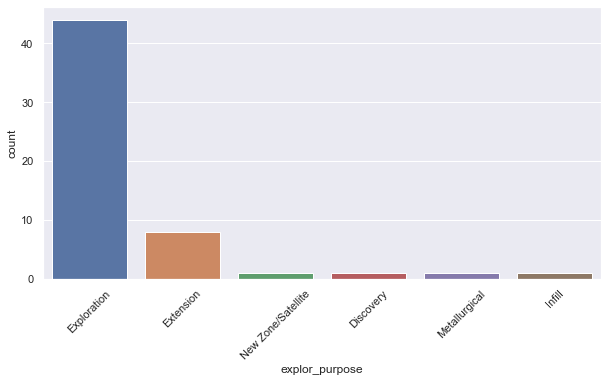

In [126]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="explor_purpose", data=main, order=main['explor_purpose'].value_counts().index)
t = plt.xticks(rotation=45)

In [127]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(main[main['explor_purpose'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'Cobalt mine distribution',
                        color = 'explor_purpose',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


# 评论 + 声明

In [128]:
col = feature_dic.loc[['comment', 'claim']][1].tolist()
# main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
缺失率统计


prop_name             0.00
prop_id               0.00
general_comments      8.28
full_work_history    35.17
enviro_comments      95.86
subcontractors       77.93
prop_name             0.00
prop_id               0.00
description_claim    22.07
dtype: object

暂时没有能力和时间进行NLP

# 煤相关

In [130]:
col = feature_dic.loc[['coal_details']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id coal_uses  economic_coal_seam_count  \
6          Agaunico    79348       NaN                       NaN   
11        Ahmavuoma    79220       NaN                       NaN   
33  Atacama Cobalto    81398       NaN                       NaN   
35              Aue    77703       NaN                       NaN   
49         Balmoral    80511       NaN                       NaN   

    total_coal_seam_count transport_method_coal_details  \
6                     NaN                           NaN   
11                    NaN                           NaN   
33                    NaN                           NaN   
35                    NaN                           NaN   
49                    NaN                           NaN   

   shipping_port_coal_detail coal_seam coal_rank coal_rank_abbrev coal_group  \
6                        NaN       NaN       NaN              NaN        NaN   
11                       NaN       NaN       NaN              NaN        NaN   
33                       NaN       NaN       NaN              NaN        NaN   
35                       NaN       NaN       NaN              NaN        NaN   
49                       NaN       NaN       NaN              NaN        NaN   

   transport_method_coal_transport  shipping_port_coal_transport export  dom  
6                              NaN                           NaN    NaN  NaN  
11                             NaN                           NaN    NaN  NaN  
33                             NaN                           NaN    NaN  NaN  
35                             NaN                           NaN    NaN  NaN  
49                             NaN                           NaN    NaN  NaN

------------------------------------------------------------ 
缺失率统计


prop_name                            0.00
prop_id                              0.00
coal_uses                          100.00
economic_coal_seam_count           100.00
total_coal_seam_count              100.00
transport_method_coal_details      100.00
shipping_port_coal_detail          100.00
coal_seam                          100.00
coal_rank                          100.00
coal_rank_abbrev                   100.00
coal_group                         100.00
transport_method_coal_transport    100.00
shipping_port_coal_transport       100.00
export                             100.00
dom                                100.00
dtype: object

缺失率过高，不可用

# 原矿生产和支出

In [131]:
col = feature_dic.loc[['ore_production_and_costs']][1].tolist()
print('------------'*5, '\n示例')
main[col].head()
print('------------'*5,'\n缺失率统计')
main[col].isnull().mean().map(lambda x: '%.2f'%(100*x))


------------------------------------------------------------ 
示例


prop_name  prop_id as_of_date_production  \
6          Agaunico    79348                   NaT   
11        Ahmavuoma    79220                   NaT   
33  Atacama Cobalto    81398                   NaT   
35              Aue    77703                   NaT   
49         Balmoral    80511                   NaT   

    mining_processing_cost_per_tonne_by_period  \
6                                          NaN   
11                                         NaN   
33                                         NaN   
35                                         NaN   
49                                         NaN   

    mining_processing_cost_per_cubic_m_by_period  \
6                                            NaN   
11                                           NaN   
33                                           NaN   
35                                           NaN   
49                                           NaN   

    production_cost_comments_by_period  ore_processed_mass_by_period  \
6                                  NaN                           NaN   
11                                 NaN                           NaN   
33                                 NaN                           NaN   
35                                 NaN                           NaN   
49                                 NaN                           NaN   

    ore_processed_volume_by_period  \
6                              NaN   
11                             NaN   
33                             NaN   
35                             NaN   
49                             NaN   

   mining_production_general_comments_by_period forecast_date  \
6                                           NaN           NaT   
11                                          NaN           NaT   
33                                          NaN           NaT   
35                                          NaN           NaT   
49                                          NaN           NaT   

   actual_estimate_forecast_production  
6                                  NaN  
11                                 NaN  
33                                 NaN  
35                                 NaN  
49                                 NaN

------------------------------------------------------------ 
缺失率统计


prop_name                                         0.00
prop_id                                           0.00
as_of_date_production                            94.48
mining_processing_cost_per_tonne_by_period      100.00
mining_processing_cost_per_cubic_m_by_period    100.00
production_cost_comments_by_period              100.00
ore_processed_mass_by_period                     97.93
ore_processed_volume_by_period                  100.00
mining_production_general_comments_by_period    100.00
forecast_date                                   100.00
actual_estimate_forecast_production              94.48
dtype: object

缺失率高，基本不可用

# 总结

1. 矿点基本信息（名称、位置）
2. 矿点各利益方信息
3. 矿点品位、储量、产能相关信息


其中1、2部分的数据可用。3缺失率过高，不推荐使用，需要通过其他方式进行数据补齐。